# Logistic Regression Project Exercise

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


----

**TASK: Run the cell below to read in the data.**

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/datasets/heart.csv')


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [7]:
# Features (X) are all columns except 'target'
X = df.drop('target', axis=1)

# Labels (y) are in the 'target' column
y = df['target']


**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [14]:
scaler = StandardScaler()

In [15]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_model = LogisticRegression()

In [18]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

### Coeffecients

**TASK: Report back the model's coefficients.**

In [23]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=101)
log_reg.fit(scaled_X_train, y_train)

# Get the coefficients of the trained model
coefficients = log_reg.coef_

# Print the coefficients
print("array" ,coefficients)


array [[-0.1460119  -0.736331    0.87254896 -0.34210587 -0.22221822  0.2183265
   0.20681801  0.37897876 -0.47888118 -0.52546222  0.46029361 -0.77312766
  -0.49532266]]


---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [26]:
y_pred = log_model.predict(scaled_X_test)

In [37]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[27 10]
 [ 4 35]]


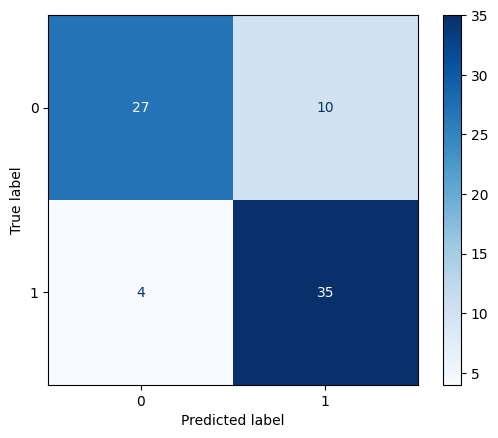

In [42]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


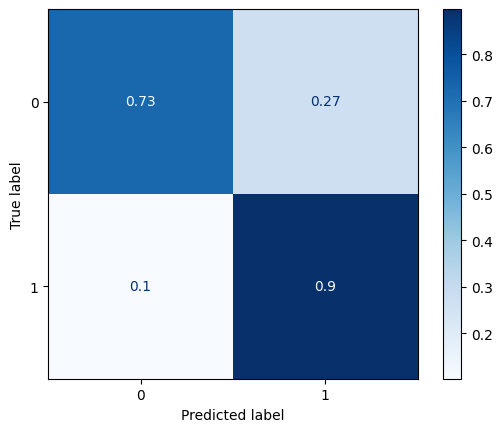

In [44]:
# Display confusion matrix
cm=confusion_matrix(y_test,y_pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79        37
           1       0.78      0.90      0.83        39

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



### Performance Curves

**TASK: Create the ROC Curve.**

In [47]:
from sklearn.metrics import RocCurveDisplay


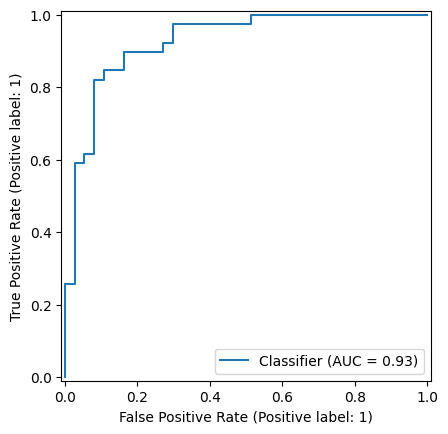

In [50]:
y_probs = log_model.predict_proba(scaled_X_test)[:, 1]

RocCurveDisplay.from_predictions(y_test, y_probs)

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [51]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [52]:
# Scale the patient data using the same scaler used on training data
scaled_patient = scaler.transform(patient)

# Make a prediction (0 = no heart disease, 1 = heart disease)
prediction = log_model.predict(scaled_patient)[0]

# Get the predicted probability of heart disease (class 1)
probability = log_model.predict_proba(scaled_patient)[0][1]

# Display result
print("Predicted Class (1 = Heart Disease):", prediction)
print("Model's confidence (probability of heart disease):", round(probability, 4))


Predicted Class (1 = Heart Disease): 0
Model's confidence (probability of heart disease): 0.0102


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


----

## Great Job!